In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, ExponentialFitter
# from Exponential import ExponentialAFTFitter
from lifelines.utils import k_fold_cross_validation
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
start_data = pd.read_csv('telco.csv')

In [5]:
import pandas as pd

def change(data):
    data_copy = data.copy()
    data_copy.drop(['ID'], axis=1, inplace=True)
    categorical_columns = ['region', 'retire', 'marital', 'ed', 'gender', 'voice', 'internet', 'custcat', 'churn', 'forward']
    data_encoded = pd.get_dummies(data_copy, columns=categorical_columns, drop_first=True)
    data_encoded = data_encoded.rename(columns={'churn_Yes': 'churn'})
    return data_encoded

In [6]:
data = change(start_data)
data

,tenure,age,address,income,region_Zone 2,region_Zone 3,retire_Yes,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Male,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn,forward_Yes
0,13,44,9,64,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,11,33,7,136,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1
2,68,52,24,116,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,33,33,12,33,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,23,30,9,30,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,27,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
996,7,34,2,22,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
997,67,59,40,944,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1
998,70,49,18,87,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


In [7]:
weibull_model = WeibullAFTFitter()
log_norm_model = LogNormalAFTFitter()
log_logistic_model = LogLogisticAFTFitter()
#exponential_model = ExponentialAFTFitter()

In [8]:
weibull = weibull_model.fit(data, duration_col='tenure', event_col='churn')
weibull_pred = weibull.predict_survival_function(data).T
weibull_pred_avg = weibull_pred.mean()
weibull.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-11-30 19:04:30 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

In [9]:
log_norm = log_norm_model.fit(data, duration_col='tenure', event_col='churn')
log_norm_pred = log_norm.predict_survival_function(data).T
log_norm_pred_avg = log_norm_pred.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-30 19:04:33 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

In [10]:
log_log = log_logistic_model.fit(data, duration_col='tenure', event_col='churn')
log_log_pred = log_log.predict_survival_function(data).T
log_log_pred_avg = log_log_pred.mean()
log_log.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-11-30 19:04:35 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

### Exponential

In [11]:
# exponential = exponential_model.fit(data, duration_col='tenure', event_col='churn')
# exponential_pred = exponential.predict_survival_function(data).T
# exponential_pred_avg = exponential_pred.mean()
# exponential.print_summary()

Comparing With AIC

In [12]:
# print(f'Exponential AIC: {exponential.AIC_}')
print(f'Log-Normal AIC: {log_norm.AIC_}')
print(f'Log-Logistic AIC: {log_log.AIC_}')
print(f'Weibull AIC: {weibull.AIC_}')
#'Exponential': exponential.AIC_,
scores = {'Log-normal': log_norm.AIC_, 'Log-logistic': log_log.AIC_, 'Weibull': weibull.AIC_}
print(f'\nThe best model based on AIC scores is: \033[1m{min(scores, key=scores.get)}\033[0m')

Log-Normal AIC: 2954.0240102517128
Log-Logistic AIC: 2956.2085614433336
Weibull AIC: 2964.3432480838806

The best model based on AIC scores is: Log-normal


Other than the AIC score and the plots, there are some other important factors to consider before choosing the best model.

When we look at the number of parameters we can understand the complexity of the model. For example, the exponential model has only 1 parameter, while weibull has 2, and Log Normal and Log Logistic models both have 3.

Another criteria is the Hazard Rate. In this case Weibull model is preffered over the other ones as it has the ability to capture both increasing and decreasing hazard rates.

I am going to trust the AIC score and go with the best performing model which is the Log-Normal model.

In [13]:
import matplotlib.pyplot as plt

def plot_prediction(prediction, label):
    plt.figure(figsize=(15, 3))
    plt.plot(prediction, label=label)
    plt.legend()
    plt.title(label)
    plt.show()


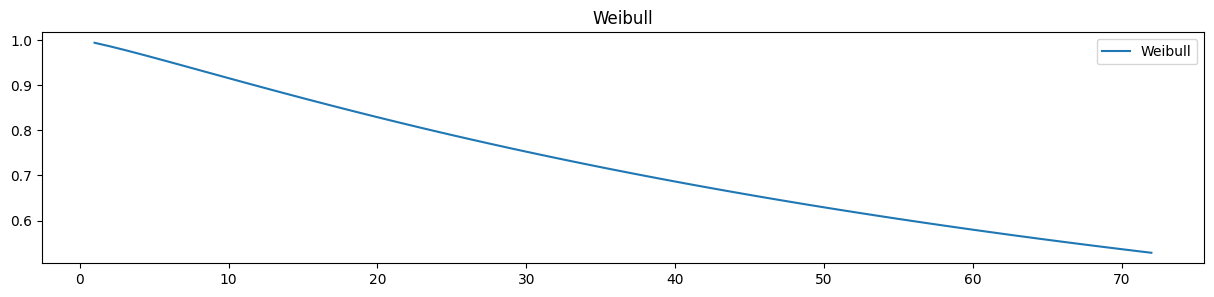

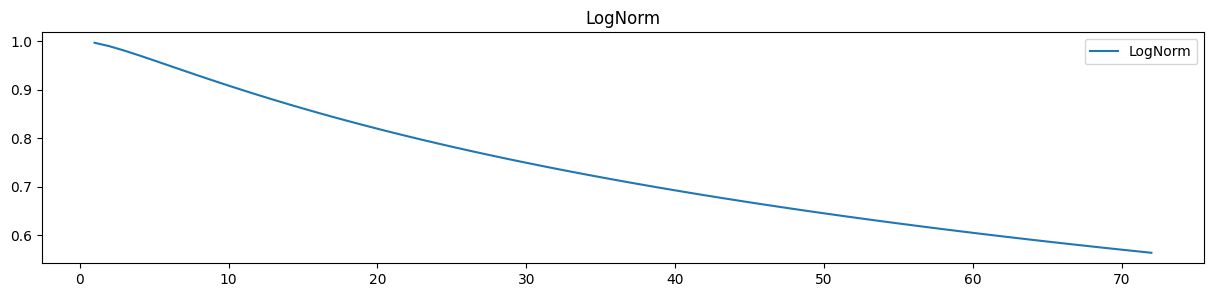

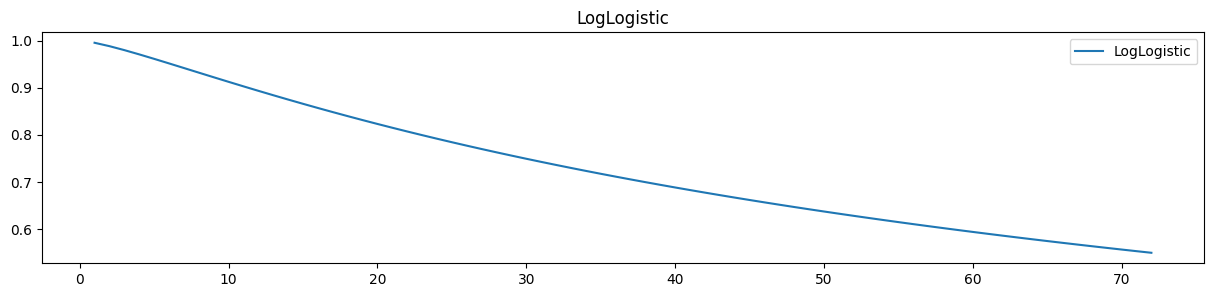

In [14]:
plot_prediction(weibull_pred_avg, 'Weibull')
plot_prediction(log_norm_pred_avg, 'LogNorm')
plot_prediction(log_log_pred_avg, 'LogLogistic')

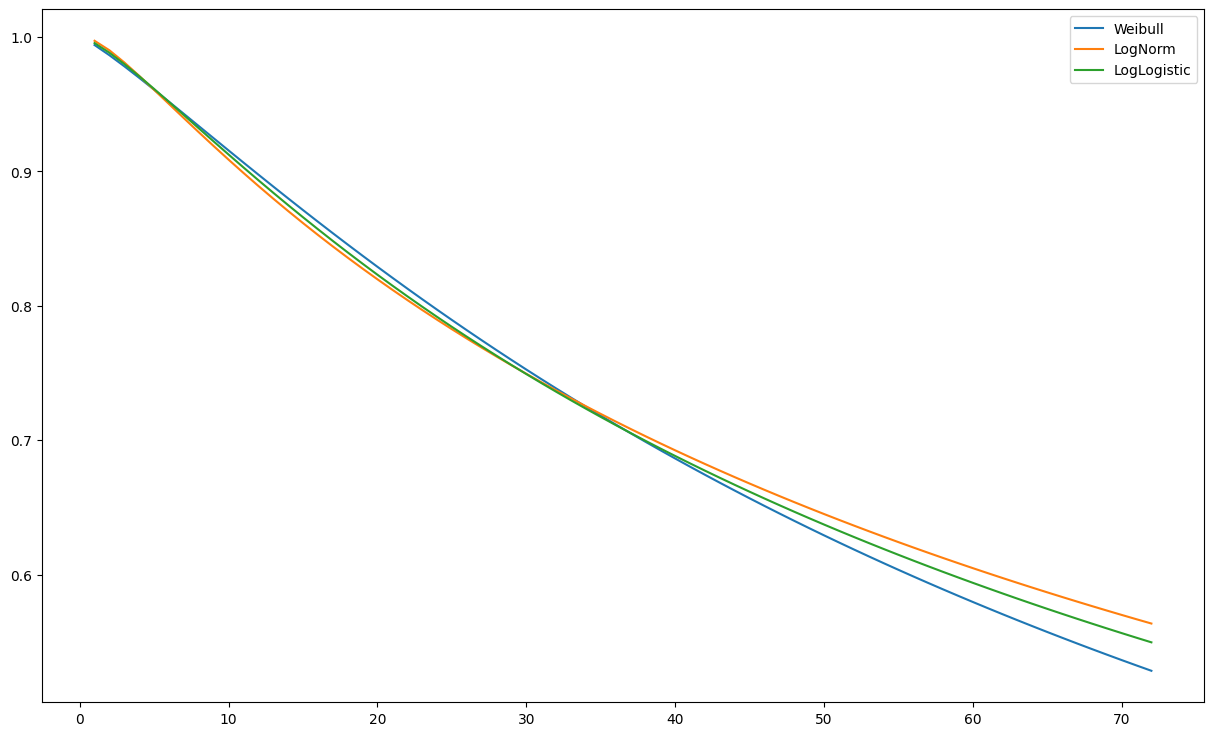

In [15]:
plt.figure(figsize=(15,9))
plt.plot(weibull_pred_avg, label='Weibull')
plt.plot(log_norm_pred_avg, label='LogNorm')
plt.plot(log_log_pred_avg, label='LogLogistic')
# plt.plot(exponential_pred_avg, label='Exponential')
plt.legend()
plt.show()

We will keep the features that are important for calculating the CLV

In [16]:
important_cols = ["address", "age", "internet_Yes", "marital_Unmarried", "tenure", "churn", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "voice_Yes"]

In [17]:
changed = data[important_cols]
changed

,address,age,internet_Yes,marital_Unmarried,tenure,churn,custcat_E-service,custcat_Plus service,custcat_Total service,voice_Yes
0,9,44,0,0,13,1,0,0,0,0
1,7,33,0,0,11,1,0,0,1,1
2,24,52,0,0,68,0,0,1,0,0
3,12,33,0,1,33,1,0,0,0,0
4,9,30,0,0,23,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,39,0,1,10,0,0,0,0,0
996,2,34,0,1,7,0,0,0,0,0
997,40,59,1,1,67,0,0,0,1,1
998,18,49,0,1,70,0,0,1,0,1


In [18]:
log_norm = log_norm_model.fit(changed, duration_col='tenure', event_col='churn')
log_norm_pred = log_norm.predict_survival_function(changed).T
log_norm_pred_avg = log_norm_pred.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 19:04:40 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.79
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

# CLV

In [19]:
clv_df = log_norm_pred.copy()

Choosing values for calculations

In [20]:
margin = 1200
seq = range(1,len(clv_df.columns)+1)
r = 0.2

In [21]:
for i in seq:
    clv_df.loc[:, i] = clv_df.loc[:, i]/((1+r/12)**(seq[i-1]-1))

In [22]:
clv_df["CLV"] = margin * clv_df.sum(axis = 1)
clv_df

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
0,0.999688,0.981766,0.962887,0.943312,0.923291,0.903030,0.882686,0.862382,0.842212,0.822249,...,0.216444,0.211340,0.206365,0.201513,0.196783,0.192170,0.187672,0.183285,0.179007,41739.889213
1,0.999736,0.982011,0.963448,0.944262,0.924671,0.904857,0.884962,0.865099,0.845357,0.825803,...,0.222415,0.217234,0.212181,0.207253,0.202445,0.197756,0.193181,0.188717,0.184363,42248.377990
2,0.999999,0.983595,0.967439,0.951520,0.935830,0.920363,0.905115,0.890083,0.875263,0.860655,...,0.334157,0.328234,0.322415,0.316696,0.311078,0.305557,0.300133,0.294804,0.289568,50016.623929
3,0.997985,0.974462,0.947865,0.919716,0.890961,0.862184,0.833749,0.805882,0.778726,0.752362,...,0.140581,0.136713,0.132963,0.129326,0.125798,0.122377,0.119057,0.115836,0.112710,34253.490896
4,0.999870,0.982748,0.965194,0.947289,0.929147,0.910870,0.892550,0.874261,0.856064,0.838008,...,0.246417,0.240959,0.235627,0.230418,0.225328,0.220356,0.215498,0.210752,0.206114,44192.873238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.996036,0.967408,0.934758,0.900580,0.866204,0.832351,0.799415,0.767609,0.737036,0.707735,...,0.111587,0.108318,0.105157,0.102098,0.099138,0.096273,0.093501,0.090816,0.088217,30737.384625
996,0.995073,0.964167,0.928987,0.892408,0.855880,0.820150,0.785604,0.752433,0.720714,0.690461,...,0.102440,0.099376,0.096415,0.093552,0.090784,0.088108,0.085519,0.083014,0.080592,29522.617822
997,0.999991,0.983523,0.967215,0.951047,0.935016,0.919124,0.903378,0.887785,0.872352,0.857087,...,0.308688,0.302785,0.296994,0.291313,0.285741,0.280276,0.274914,0.269655,0.264497,48540.522824
998,0.999923,0.983062,0.965975,0.948693,0.931279,0.913801,0.896318,0.878885,0.861546,0.844338,...,0.261998,0.256388,0.250903,0.245538,0.240291,0.235160,0.230142,0.225234,0.220435,45373.537816


In [23]:
start_data["CLV"] = clv_df.CLV

From these results we can understand that the customers who have higher CLV are the ones with low Churn risk.

In [24]:
print(start_data.groupby(["gender", "ed","marital"])[["CLV"]].mean())

print(start_data.groupby("gender")[["CLV"]].mean())
print(start_data.groupby("voice")[["CLV"]].mean())
print(start_data.groupby("retire")[["CLV"]].mean())
print(start_data.groupby("internet")[["CLV"]].mean())
print(start_data.groupby("marital")[["CLV"]].mean())
print(start_data.groupby("ed")[["CLV"]].mean())
print(start_data.groupby("custcat")[["CLV"]].mean())
print(start_data.groupby("forward")[["CLV"]].mean())
print(start_data.groupby("region")[["CLV"]].mean())

                                                        CLV
gender ed                           marital                
Female College degree               Married    38700.250881
                                    Unmarried  36202.563845
       Did not complete high school Married    42655.726389
                                    Unmarried  42208.939101
       High school degree           Married    41730.812079
                                    Unmarried  38798.258151
       Post-undergraduate degree    Married    41469.846423
                                    Unmarried  33163.532137
       Some college                 Married    39603.312317
                                    Unmarried  38833.030233
Male   College degree               Married    40474.492643
                                    Unmarried  34019.819116
       Did not complete high school Married    45561.598988
                                    Unmarried  41463.351385
       High school degree           Marr

The most noticeable difference in Customer Lifetime Value (CLV) is observed when considering the "retire" variable. This can be explained by the fact that older people are more conservative and tend to rely on the product that they are using. I could find a group with a high CLV. Those are the males who did not finish the high school and are married. In avarage they have around 45500 of CLV. I think that this has to do with the stability in their lives and the influence they might have on the surrounding people.

# Conclusion

 From our data we could understand that the higher is the CLV, the lower is the risk of churn.

The coefficients in our analysis carry specific implications:

- Positive coefficients signify that an increase in a given variable positively influences the anticipated customer lifetime.
- Negative coefficients indicate that an increase in a specific variable leads to a decrease in the expected customer lifetime.
- The magnitude of the coefficient reflects the strength of the variable's impact on customer lifetime.

For effective retention strategies based on CLV scores:

 As the younger segment has lower CLV:

- Actively listen to customer feedback and address concerns promptly, particularly for the younger demographic.
- Implement exclusive discounts, special offers, or other perks for loyal customers, with a specific focus on the younger age group.
- Work on the internet quality, do better customer support for internet users, as the CLV of the people who use internet are low.







## Budget

We will set values for retention rate and cost per customer

In [31]:
changed["CLV"] = clv_df["CLV"]
cust_retained = changed[changed['churn'] == 0]
retained_clv = cust_retained['CLV'].sum()

retention_rate = 0.7
cost_per_customer = 3500
cost_retention = len(changed) * retention_rate * cost_per_customer

budget = retained_clv - cost_retention

print("BUDGET:", budget)

BUDGET: 27693477.23765699


For the numbers that we set this will be our budget for 1 Year.